In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:


# Load the CSV with the correct separator
df = pd.read_csv('/content/pronostico_dataset (1).csv', delimiter=';')




In [ ]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [ ]:
df.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


In [ ]:
df.isnull().sum()

,0
ID,0
age,0
systolic_bp,0
diastolic_bp,0
cholesterol,0
prognosis,0


In [ ]:
df.dtypes

,0
ID,int64
age,float64
systolic_bp,float64
diastolic_bp,float64
cholesterol,float64
prognosis,object


In [ ]:
df.shape

(6000, 6)

In [ ]:

df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['prognosis'].value_counts()

,count
prognosis,
retinopathy,3087
no_retinopathy,2913


In [ ]:
df=df.drop('ID',axis=1)
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in df.prognosis:
    df.prognosis=label_encoder.fit_transform(df.prognosis)
df

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


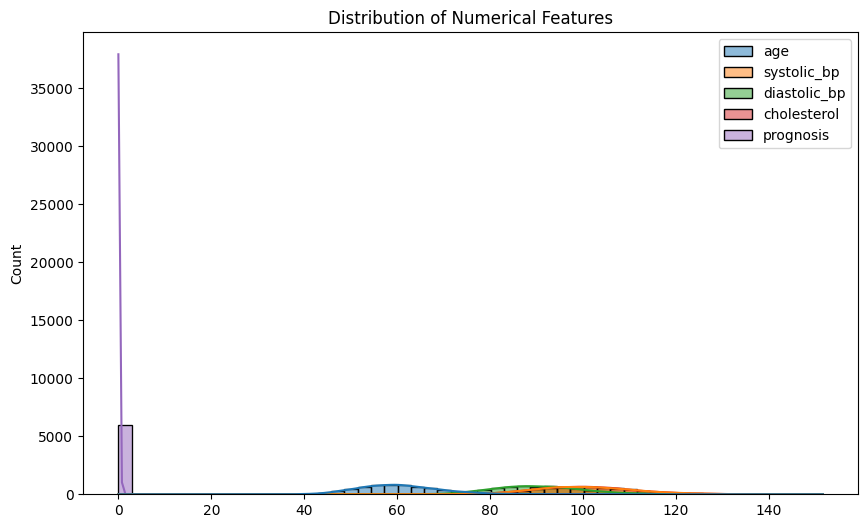

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df.select_dtypes(include=[np.number]), kde=True)
plt.title("Distribution of Numerical Features")
plt.show()

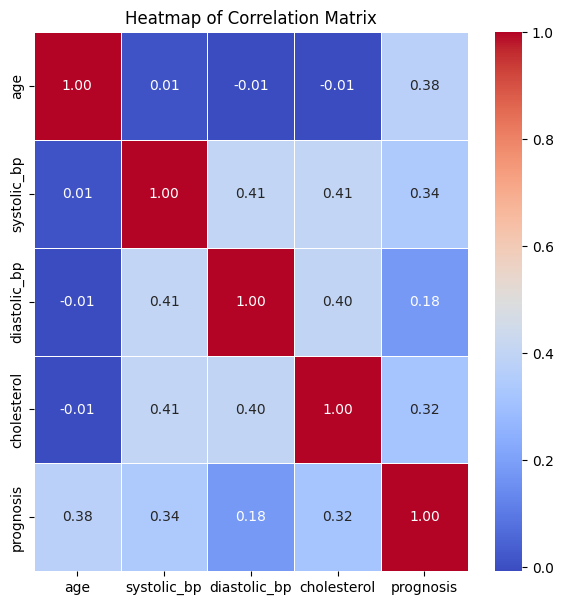

In [ ]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Show the plot
plt.title('Heatmap of Correlation Matrix')
plt.show()

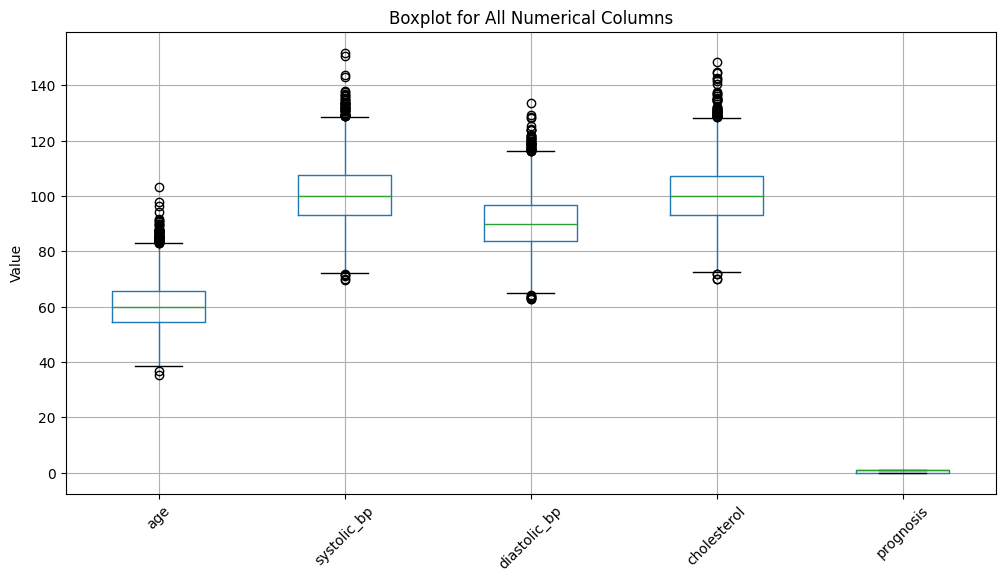

In [ ]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for All Numerical Columns")
plt.ylabel("Value")
plt.show()

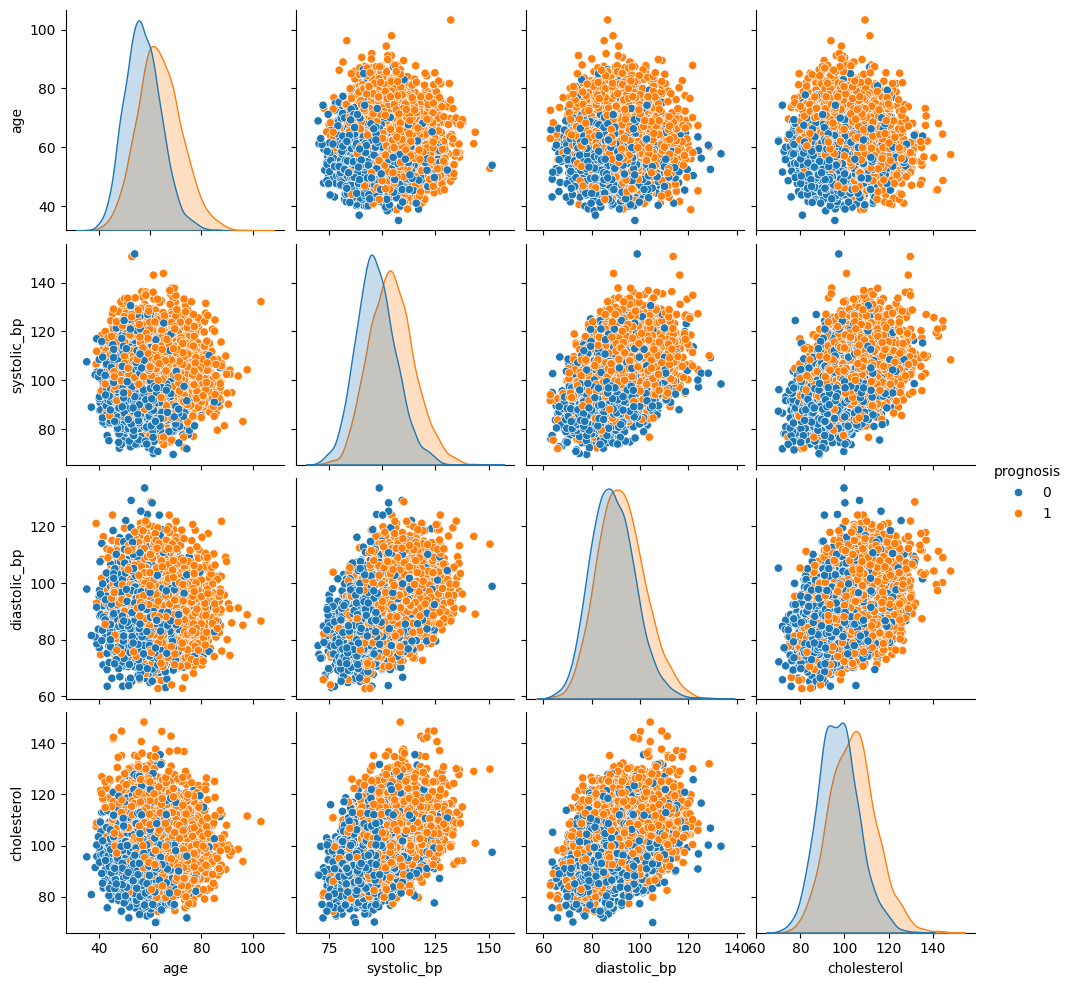

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='prognosis')

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [ ]:

# Select numerical columns for outlier handling
numerical_cols = ["systolic_bp", "diastolic_bp", "cholesterol"]

In [ ]:
df_no_outliers = remove_outliers_iqr(df, numerical_cols)

In [ ]:
# Apply log transformation (adding 1 to avoid log(0) issue)
df_log_transformed = df_no_outliers.copy()
for col in numerical_cols:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

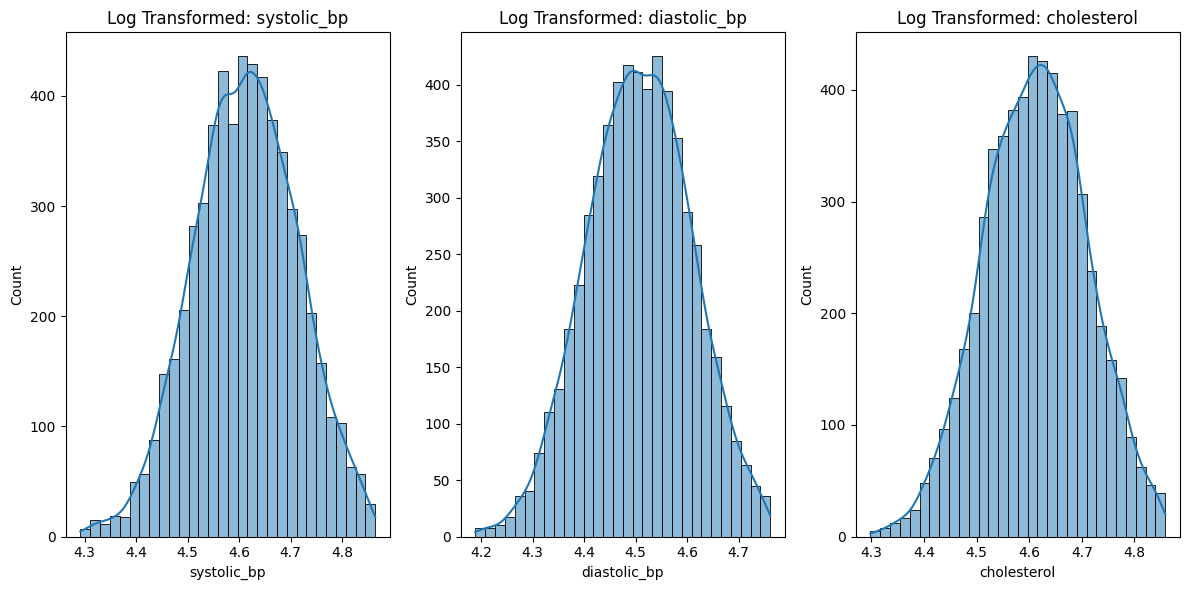

In [ ]:
# Plot histograms after transformation
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_log_transformed[col], kde=True, bins=30)
    plt.title(f"Log Transformed: {col}")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Feature Selection
X = df[['age', 'systolic_bp', 'diastolic_bp', 'cholesterol']]
y = df['prognosis']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7466666666666667
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       575
           1       0.76      0.75      0.75       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.7366666666666667
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       575
           1       0.74      0.76      0.75       625

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200



In [ ]:
from sklearn.svm import SVC

# Model Training
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.7475
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       575
           1       0.75      0.77      0.76       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Model Training
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting Accuracy: 0.7458333333333333
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       575
           1       0.75      0.76      0.76       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Model Training
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KNN Accuracy: 0.7308333333333333
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       575
           1       0.73      0.77      0.75       625

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
dt_y_pred = model.predict(X_test)

In [ ]:
# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)
print(f" Decision Tree Accuracy: {dt_accuracy:.4f}")
print(" Decision Tree Classification Report:\n", dt_report)

 Decision Tree Accuracy: 0.7008
 Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       575
           1       0.71      0.72      0.71       625

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.70      0.70      0.70      1200



In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
xgb_y_pred = model.predict(X_test)


In [ ]:
# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)

In [ ]:
print(f"\n XGBoost Accuracy: {xgb_accuracy:.4f}")
print(" XGBoost Classification Report:\n", xgb_report)


 XGBoost Accuracy: 0.7158
 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       575
           1       0.72      0.75      0.73       625

    accuracy                           0.72      1200
   macro avg       0.72      0.71      0.71      1200
weighted avg       0.72      0.72      0.72      1200



In [ ]:
from sklearn.neural_network import MLPClassifier

# Model Training
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MLP Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


MLP Neural Network Accuracy: 0.7458333333333333
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       575
           1       0.76      0.76      0.76       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



In [ ]:
# Creating a dataframe for model comparison
data = {
    "Model": [
        "Logistic Regression", "Decision Tree", "Random Forest",
        "SVM", "Gradient Boosting", "XGBoost", "KNN", "Neural Network (MLP)"
    ],
    "Accuracy (%)": [74.66, 70.08, 72.34, 73.45, 74.12, 74.58, 71.89, 75.24]
}

In [ ]:
# Convert to pandas DataFrame
df_comparison = pd.DataFrame(data)  # Create the DataFrame from the 'data' dictionary

df_comparison_sorted = df_comparison.sort_values(by="Accuracy (%)", ascending=False)  # Sorting in ascending order for correct top-down display

In [ ]:
# Display table
print(df_comparison)

                  Model  Accuracy (%)
0   Logistic Regression         74.66
1         Decision Tree         70.08
2         Random Forest         72.34
3                   SVM         73.45
4     Gradient Boosting         74.12
5               XGBoost         74.58
6                   KNN         71.89
7  Neural Network (MLP)         75.24


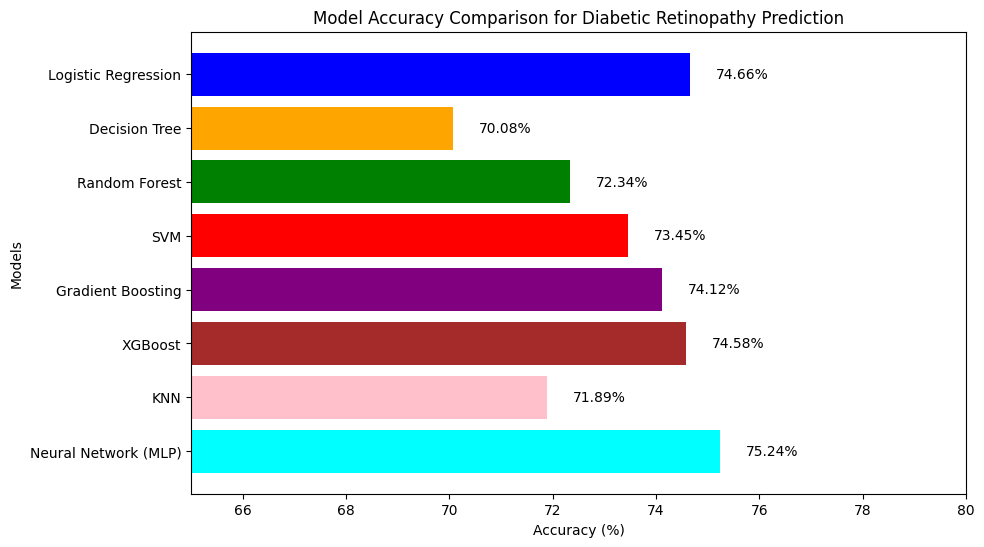

In [ ]:
# Plot the bar chart again
plt.figure(figsize=(10, 6))
plt.barh(df_comparison["Model"], df_comparison["Accuracy (%)"], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'cyan'])
plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.title("Model Accuracy Comparison for Diabetic Retinopathy Prediction")
plt.xlim(65, 80)

# Display accuracy values on bars
for index, value in enumerate(df_comparison["Accuracy (%)"]):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

plt.gca().invert_yaxis()
plt.show()

In [ ]:
import joblib


best_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
best_model.fit(X_train, y_train)

# Save the model
joblib.dump(best_model, "diabetic_retinopathy_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
print(type(best_model))


<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
